In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from sklearn.tree import export_graphviz

import graphviz


from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# step 1 데이터 구성하기

In [2]:
df = pd.read_csv("Concrete.csv", engine='python')
df

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
df_y = df['CONCRETE_COMPRESSIVE_STRENGTH']
df_x = df.drop('CONCRETE_COMPRESSIVE_STRENGTH', axis=1, inplace=False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size =0.4, random_state=1234)
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_test_x, df_test_y, train_size =0.5, random_state=1234)

print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("valid data X size : ", df_valid_x.shape)
print("valid data Y size : ", df_valid_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)

train data X size :  (412, 8)
train data Y size :  (412,)
valid data X size :  (309, 8)
valid data Y size :  (309,)
test data X size :  (309, 8)
test data Y size :  (309, 8)


# step 2 모델 생성

# 모델 parameter 조정

In [4]:
train_score = []
valid_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    valid_score.append(tree.score(df_valid_x, df_valid_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidScore"] = valid_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValidScore
0,1,0.995,0.787
1,2,0.975,0.786
2,3,0.949,0.787
3,4,0.932,0.775
4,5,0.910,0.803
5,6,0.894,0.784
6,7,0.882,0.769
7,8,0.872,0.764
8,9,0.846,0.748
9,10,0.837,0.751


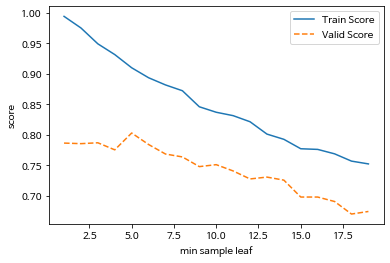

In [5]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("min sample leaf")
plt.legend()

leaf = 5 일때 차이가 가장 적은것으로 보이므로 leaf를 5로 선택하였다. 

In [6]:
train_score = []
valid_score = []
para_split = [n_split * 2 for n_split in range(1,31)]
for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    valid_score.append(tree.score(df_valid_x, df_valid_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = valid_score
df_score_split.round(3)


,MinSamplesSplit,TrainScore,TestScore
0,2,0.910,0.803
1,4,0.910,0.803
2,6,0.910,0.803
3,8,0.910,0.803
4,10,0.910,0.803
5,12,0.903,0.805
6,14,0.889,0.782
7,16,0.886,0.784
8,18,0.872,0.770
9,20,0.864,0.756


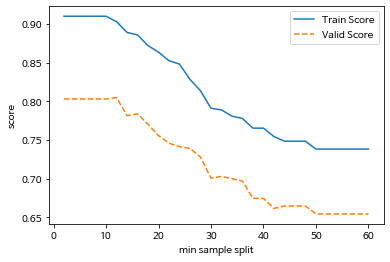

In [7]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("min sample split")
plt.legend()


split이 12일때 가장 차이가 적은것으로 보이므로,split은 12으로 선택하였다.

In [8]:
train_score = []
valid_score = []
para_depth = [depth for depth in range(1,15)]
for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, min_samples_split=12, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    valid_score.append(tree.score(df_valid_x, df_valid_y))

    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["ValidScore"] = valid_score
df_score_depth.round(3)


,Depth,TrainScore,ValidScore
0,1,0.237,0.299
1,2,0.455,0.484
2,3,0.646,0.588
3,4,0.752,0.684
4,5,0.833,0.732
5,6,0.885,0.792
6,7,0.897,0.794
7,8,0.901,0.799
8,9,0.903,0.805
9,10,0.903,0.805


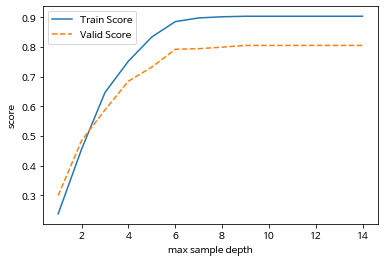

In [9]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, valid_score, linestyle="--", label= "Valid Score")
plt.ylabel("score")
plt.xlabel("max sample depth")
plt.legend()

depth는 9일 때 차이가 가장 적은것으로 보이므로, depth는 9을 선택했다.

# Step3 최종모델선정

In [10]:
tree_final = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, min_samples_split=12, max_depth=9)
tree_final.fit(df_train_x, df_train_y)
print("score on training set : ", tree_final.score(df_train_x,df_train_y))
print("score on valid set : ", tree_final.score(df_valid_x,df_valid_y))


score on training set :  0.9031474001195519
score on valid set :  0.8048564575708829


training set은 90.31%, valid set은 80.48%임을 알 수있다.

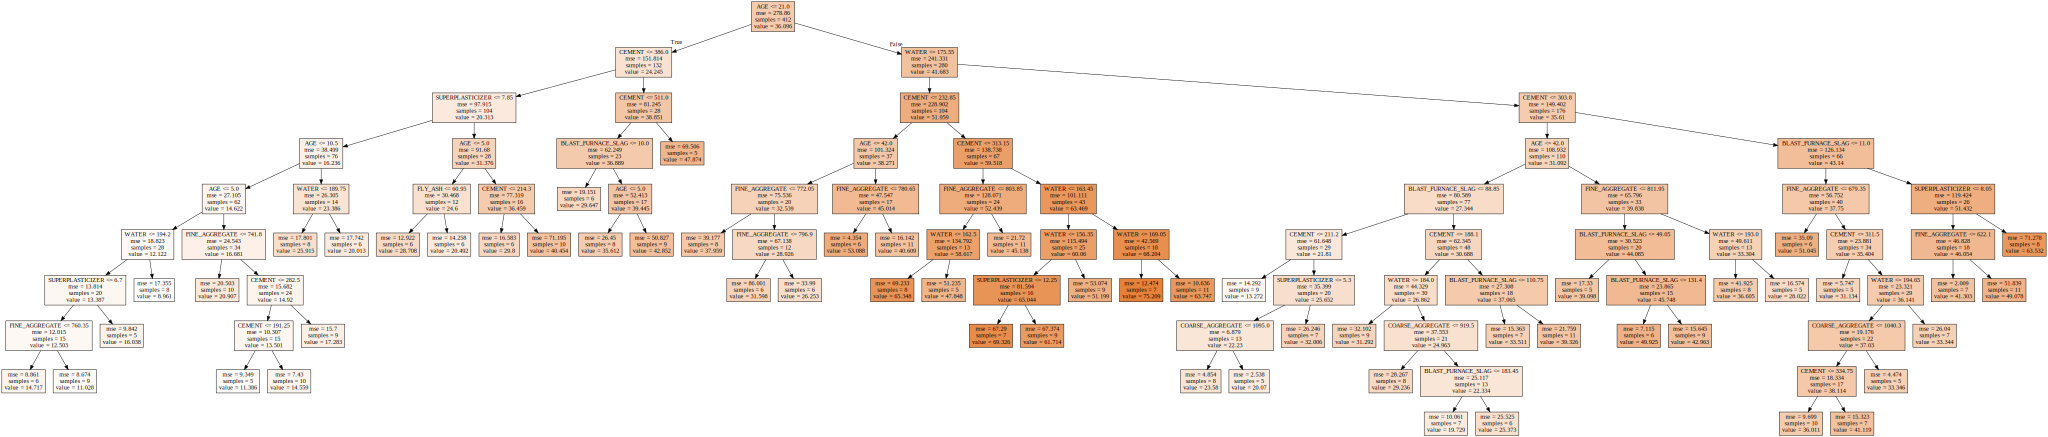

In [11]:
v_feature_name = df_train_x.columns
export_graphviz(tree_final, out_file="tree_final.dot", feature_names = v_feature_name, impurity=True, filled=True)

with open("tree_final.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 결론도출

In [12]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.334
0,CEMENT,0.285
3,WATER,0.208
4,SUPERPLASTICIZER,0.068
1,BLAST_FURNACE_SLAG,0.052
6,FINE_AGGREGATE,0.047
5,COARSE_AGGREGATE,0.003
2,FLY_ASH,0.002


Text(0, 0.5, '변수')

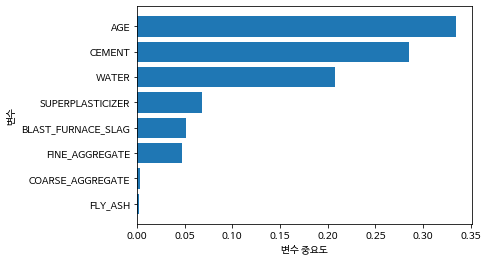

In [13]:
df_importance.sort_values("Importance", ascending = True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

콘크리트 강도는 AGE,CEMENT, WATER, SUPERPLATICIZER 순으로 영향을 주는 것을 알 수있다. 

# TEST 결과

In [14]:
pred = tree_final.predict(df_test_x)
error = df_test_y - pred
mse = np.mean(error * error)
mae = np.mean(abs(error))
print("MSE : " , mse)
print("MAE : ", mae)

MSE :  58.97483017681845
MAE :  5.844827169055324


In [15]:
print("score on training set : ", tree_final.score(df_train_x,df_train_y))
print("score on test set : ", tree_final.score(df_test_x,df_test_y))

score on training set :  0.9031474001195519
score on test set :  0.7922805163838156


# 랜덤포레스트

# step 1 데이터 구성하기

In [16]:
df = pd.read_csv("Concrete.csv", engine='python')
df

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [17]:
df_y = df['CONCRETE_COMPRESSIVE_STRENGTH']
df_x = df.drop('CONCRETE_COMPRESSIVE_STRENGTH', axis=1, inplace=False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size =0.4, random_state=1234)
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_test_x, df_test_y, train_size =0.5, random_state=1234)

print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("valid data X size : ", df_valid_x.shape)
print("valid data Y size : ", df_valid_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)

train data X size :  (412, 8)
train data Y size :  (412,)
valid data X size :  (309, 8)
valid data Y size :  (309,)
test data X size :  (309, 8)
test data Y size :  (309, 8)


# step 2 모델 생성

# 모델 parameter 조정(n_estimator)

In [18]:
train_score = []
valid_score = []
para_n_tree = [n_tree * 5 for n_tree in range(1,30)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state=1234, n_estimators=v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x, df_valid_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["ValidScore"] = valid_score

df_score_n.round(3)

,n_estimators,TrainScore,ValidScore
0,5,0.952,0.829
1,10,0.962,0.865
2,15,0.967,0.874
3,20,0.970,0.878
4,25,0.971,0.881
5,30,0.972,0.884
6,35,0.973,0.886
7,40,0.974,0.886
8,45,0.973,0.885
9,50,0.973,0.886


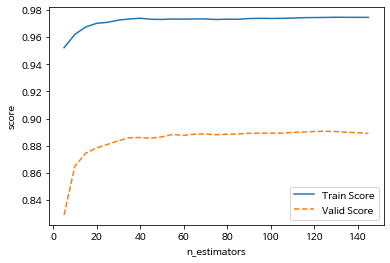

In [19]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()


In [20]:
n_estimator가 125일 때 가장 성능이 좋은것으로 나오므로 n_estimator를 125로 택했다.

SyntaxError: invalid syntax (<ipython-input-20-cfd994ba0d6f>, line 1)

# parameter 조정 (min_sample_leaf)

In [ ]:
train_score = []
valid_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators=125, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x, df_valid_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidScore"] = valid_score

df_score_leaf.round(3)

In [ ]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("min sample leaf")
plt.legend()


leaf가 5일때 가장 성능이 좋은것으로 보이므로 leaf를 5로 선택하였다.

# parameter 조정 (min_samples_split)

In [ ]:
train_score = []
valid_score = []
para_split = [n_split * 2 for n_split in range(2,21)]
for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators=125, min_samples_leaf=5, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x, df_valid_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["ValidScore"] = valid_score
df_score_split.round(3)


In [ ]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("min sample split")
plt.legend()

split은 10일때 가장 성능이 좋으므로 split은 10을 선택했다.

# parameter 조정 (max depth)

In [ ]:
train_score = []
valid_score = []
para_depth = [depth for depth in range(1,20)]
for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators=125, min_samples_leaf=5,
                               min_samples_split=10, max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x, df_valid_y))

    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["ValidScore"] = valid_score
df_score_depth.round(3)


In [ ]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("max depth")
plt.legend()

depth는 8이 가장 성능이 좋으므로 depth를 8로 선택하였다.

# Step3 최종모델선정

In [26]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=125, min_samples_leaf=5,
                               min_samples_split=10, max_depth=8)
rf_final.fit(df_train_x, df_train_y)
print("score on training set : ", rf_final.score(df_train_x,df_train_y))
print("score on valid set : ", rf_final.score(df_valid_x,df_valid_y))



score on training set :  0.9056317564748699
score on valid set :  0.8528232795584001


training set은 90.56%, valid set은 85.28%임을 알 수있다.

# 결론 도출

In [33]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.348
0,CEMENT,0.290
3,WATER,0.180
4,SUPERPLASTICIZER,0.059
1,BLAST_FURNACE_SLAG,0.051
6,FINE_AGGREGATE,0.044
5,COARSE_AGGREGATE,0.017
2,FLY_ASH,0.010


Text(0, 0.5, '변수')

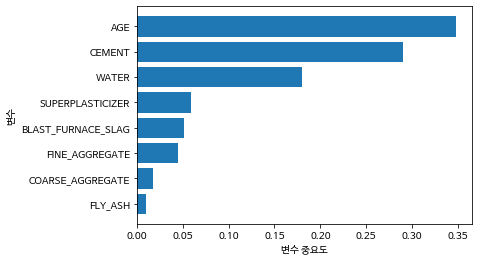

In [34]:
df_importance.sort_values("Importance", ascending = True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

콘크리트 강도는 AGE,CEMENT, WATER, SUPERPLATICIZER 순으로 영향을 주는 것을 알 수있다. 

# TEST 결과

In [36]:
pred = rf_final.predict(df_test_x)
error = df_test_y - pred
mse = np.mean(error * error)
mae = np.mean(abs(error))
print("MSE : " , mse)
print("MAE : ", mae)

MSE :  42.4047788098376
MAE :  5.174619860724339


In [38]:
print("score on training set : ", rf_final.score(df_train_x,df_train_y))
print("score on test set : ", rf_final.score(df_test_x,df_test_y))
print("valid set이 85.28%인것과 비교했을 때 test set 역시 85.06%로 거의 근사하게 학습이 되었다고 생각할 수 있다.")

score on training set :  0.9056317564748699
score on test set :  0.8506430839931386
valid set이 80.4%인것과 비교했을 때 test set 역시 79.2%로 거의 근사하게 학습이 되었다고 생각할 수 있다.


의사사결정나무와 랜덤포레스트로 분석한 결과 랜덤포레스트가 test score도 높고, mse값 역시 더 낮으므로 더 성능이 좋은 모델임을 알 수있다.